# Reference 

https://www.kaggle.com/code/andradaolteanu/pytorch-rnns-and-lstms-explained-acc-0-99/notebook

In [32]:
import pandas as pd
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
import math
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os
import numpy as np

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import sklearn.metrics
import seaborn as sns
import random
# def set_seed(seed = 1234):
#     '''Sets the seed of the entire notebook so results are the same every time we run.
#     This is for REPRODUCIBILITY.'''
#     np.random.seed(seed)
#     random.seed(seed)
#     torch.manual_seed(seed)
#     torch.cuda.manual_seed(seed)
#     # When running on the CuDNN backend, two further options must be set
#     torch.backends.cudnn.deterministic = True
#     # Set a fixed value for the hash seed
#     os.environ['PYTHONHASHSEED'] = str(seed)
    
# set_seed()

In [33]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 10)

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
def loadData(image_path,train_folder_name):
    char = []
    y =[]
    
    for filename in os.listdir(image_path):
      char_path = os.path.join(image_path, filename)
      path = os.path.join(char_path, train_folder_name)
      for file_txt in os.listdir(path):
        file_path = os.path.join(path, file_txt)
        # print(file_path)
        ch = pd.read_csv(file_path, header = None, delimiter=' ')
        # print(ch.columns)
        ch.drop(ch.columns[39], axis=1, inplace=True)
        # print(np.array(ch).T)
        char.append(np.array(ch))
        y.append(filename)

    label=[]
    for z in y:
        if z=='ba':
            label.append([1,0,0,0,0])
        if z=='bhA':
            label.append([0,1,0,0,0])
        if z=='kaa':
            label.append([0,0,1,0,0])
        if z=='tA':
            # print('dA')
            label.append([0,0,0,1,0])
        if z=='tl':
            # print('lA')
            label.append([0,0,0,0,1])
        
            
    charater, label = char, np.array(label).astype(np.float32)

    return charater, label

In [36]:
path = "/content/drive/My Drive/Colab Notebooks/Deep Learning  - Sem 2/Assignment 4/Dataset/CV"

train, label = loadData(path,'Train')

In [37]:
len(train)

1591

In [38]:
# print( train[0] )

In [39]:
len(label)

1405

In [40]:
# plt.plot(train[10][:,0],train[10][:,1])

In [41]:
class RNN_Char(nn.Module):
    def __init__(self, input_size, hidden_size, layer_size, output_size):
        super(RNN_Char, self).__init__()
        
        self.input_size, self.hidden_size, self.layer_size, self.output_size = input_size, hidden_size, layer_size, output_size
        
        # Step1: the RNN model
        self.rnn = nn.RNN(input_size, hidden_size)
        self.layer = nn.Linear(hidden_size, output_size)
        self.soft = nn.Softmax(dim=0)
            
            
    def forward(self, images, prints=False):
        if prints: print('images shape:', images.shape)  
          
        # RNN:
        output, _ = self.rnn(images)
        if prints: print('RNN: output shape:', output.shape, '\n')
        
        # FNN:
        output = self.layer(output[-1])
        output =self.soft(output)
        if prints: print('FNN: Final output shape:', output.shape)
        
        return output

In [42]:
input_size = 39      
hidden_size = 120   # number of hidden neurons
layer_size = 3        # number of layers
output_size = 5      # possible choices

In [43]:
# Instantiate the model
# We'll use TANH as our activation function
rnn_rnn = RNN_Char(input_size, hidden_size, layer_size, output_size)

In [44]:
## Basic
# input = torch.from_numpy(train[10])
# output=rnn_rnn(input)
# output

In [45]:
def rnn_accuracy(train):
  train_loss=0

  confusion_matrix = np.zeros((5,5))
  # print(confusion_matrix)
  epoch =10
  for i in range(len(label)-1):
    A = train[i]
    A = A.astype(np.float32)
    input =torch.from_numpy(A)
    l = label[i]
    l = l.astype(np.float32)
    l=np.argmax(l)
    lbl  =torch.tensor(l)
    optimizer.zero_grad()
    output=rnn_rnn(input)
    pre = torch.argmax(output).item()
    act = lbl.item()
    
    if pre == act :
      confusion_matrix[act][act]+=1
    else:
      confusion_matrix[act][pre]+=1

  Acc = confusion_matrix[0][0]+confusion_matrix[1][1]+confusion_matrix[2][2]+confusion_matrix[3][3]+confusion_matrix[4][4]
  Total = np.sum(confusion_matrix)
  Acc = 100* Acc/Total
  print('Accuracy: ',Acc)
  print(confusion_matrix)

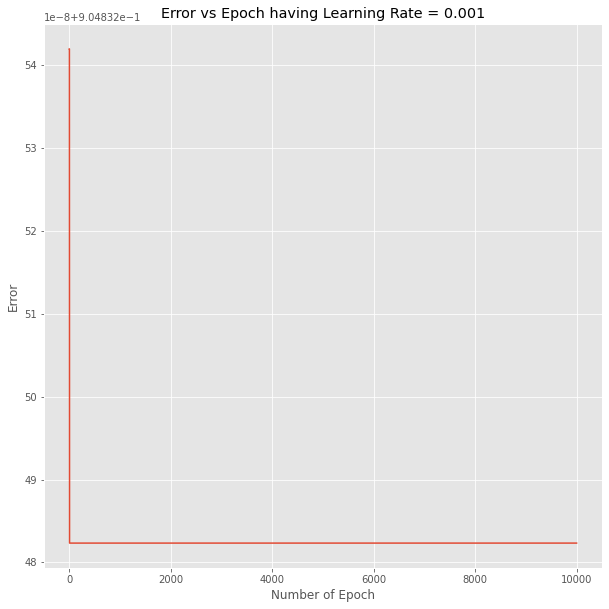

Accuracy:  36.25356125356125
[[  0.   0. 289.   1.   0.]
 [  0.   0. 197.   0.   0.]
 [  0.   0. 509.   0.   1.]
 [  0.   0. 405.   0.   2.]
 [  0.   0.   0.   0.   0.]]


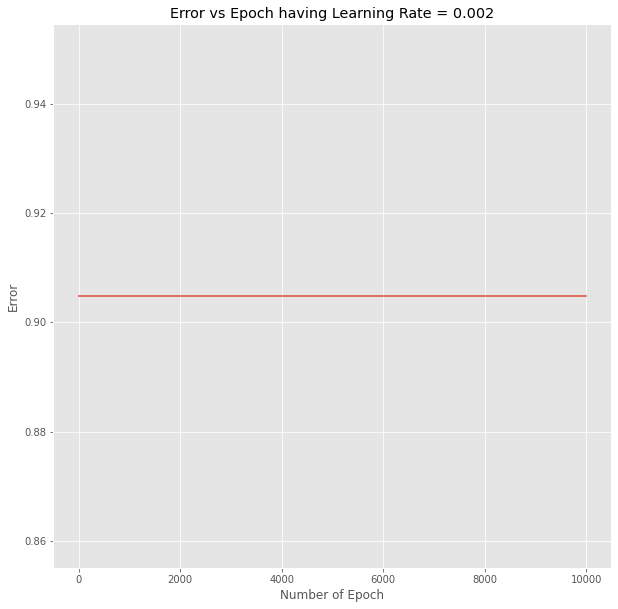

Accuracy:  36.25356125356125
[[  0.   0. 289.   1.   0.]
 [  0.   0. 197.   0.   0.]
 [  0.   0. 509.   0.   1.]
 [  0.   0. 405.   0.   2.]
 [  0.   0.   0.   0.   0.]]


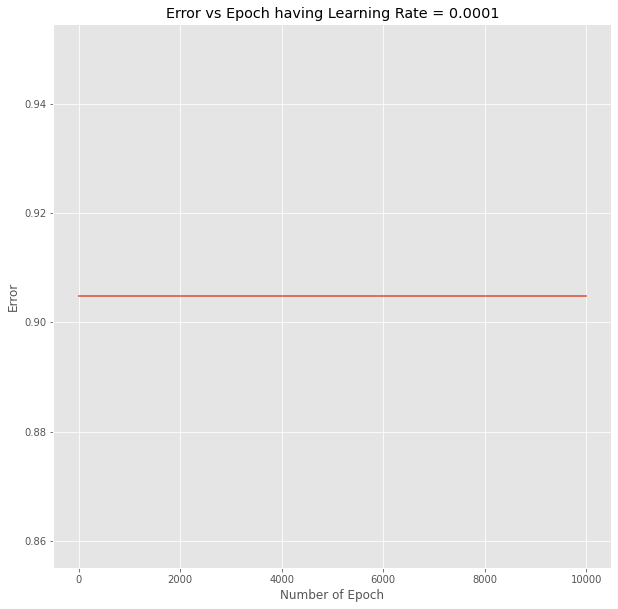

Accuracy:  36.25356125356125
[[  0.   0. 289.   1.   0.]
 [  0.   0. 197.   0.   0.]
 [  0.   0. 509.   0.   1.]
 [  0.   0. 405.   0.   2.]
 [  0.   0.   0.   0.   0.]]


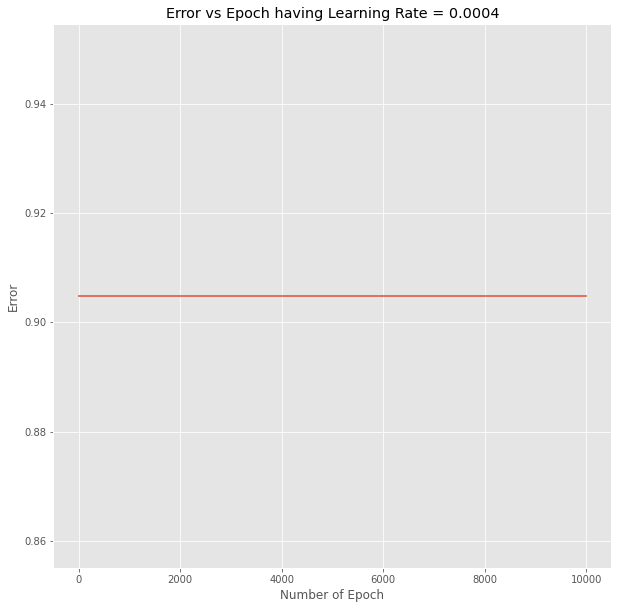

Accuracy:  36.25356125356125
[[  0.   0. 289.   1.   0.]
 [  0.   0. 197.   0.   0.]
 [  0.   0. 509.   0.   1.]
 [  0.   0. 405.   0.   2.]
 [  0.   0.   0.   0.   0.]]


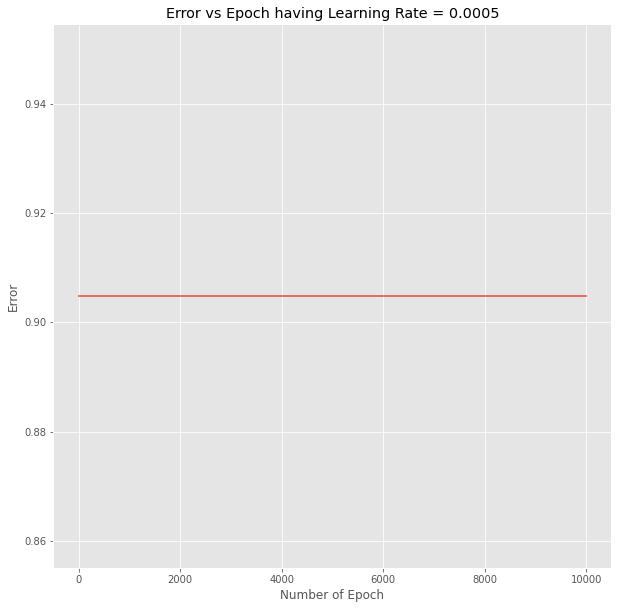

Accuracy:  36.25356125356125
[[  0.   0. 289.   1.   0.]
 [  0.   0. 197.   0.   0.]
 [  0.   0. 509.   0.   1.]
 [  0.   0. 405.   0.   2.]
 [  0.   0.   0.   0.   0.]]


In [47]:
criterion = nn.CrossEntropyLoss()
learning_rates = [ 0.001, 0.002, 0.0001, 0.0004, 0.0005]

for pos in range(len(learning_rates)):
  optimizer = optim.Adam(rnn_rnn.parameters(), lr=learning_rates[pos])
  losss =[]
  epoch = 10000
  preloss=0
  
  for j in range(epoch):
    train_loss=0
    for i in range(len(label)-1):

      A = train[i]
      A = A.astype(np.float32)
      input =torch.from_numpy(A)
      l = label[i]
      l = l.astype(np.float32)
      l=np.argmax(l)
      lbl  =torch.tensor(l)
      optimizer.zero_grad()
      output=rnn_rnn(input)
      
      # print(output)
      # print(lbl)

      loss = criterion(input=output, target =lbl)
      loss.backward()
      # Updates the weights
      optimizer.step()
      
      # Save Loss & Accuracy after each iteration
      train_loss += loss.item()
      losss.append(train_loss)
      preloss = train_loss

      if abs(preloss-train_loss)<=10e-4:
        break
      
    # Print Average Train Loss & Accuracy after each epoch
    # print('TRAIN | Epoch: {}/{} | Loss: {:.2f} |'.format(j+1, epoch, train_loss))

  plt.plot(losss)
  plt.xlabel("Number of Epoch")
  plt.ylabel("Error")
  plt.title("Error vs Epoch having Learning Rate = {}".format(learning_rates[pos]))
  plt.show()

  # Accuracy and Confusion matrix
  rnn_accuracy(train)

# Different Model

In [ ]:
class VanillaRNN_MNIST(nn.Module):
    def __init__(self, batch_size, input_size, hidden_size, output_size):
        super(VanillaRNN_MNIST, self).__init__()
        self.batch_size, self.input_size, self.hidden_size, self.output_size = batch_size, input_size, hidden_size, output_size
        
        # RNN Layer
        self.rnn = nn.RNN(input_size, hidden_size)
        # Fully Connected Layer
        self.layer = nn.Linear(hidden_size, self.output_size)
    
    def forward(self, images, prints=False):
        # Initialize hidden state with zeros
        hidden_state = torch.zeros(1, self.batch_size, self.hidden_size)
        if prints: print('Initial hidden state Shape:', hidden_state.shape)
        
        # Creating RNN
        hidden_outputs, hidden_state = self.rnn(images, hidden_state)
        
        # Log probabilities
        out = self.layer(hidden_state)
        
        if prints:
            print('----hidden_outputs shape:', hidden_outputs.shape, '\n' +
                  '----final hidden state:', hidden_state.shape, '\n' +
                  '----out shape:', out.shape)
        
        # Reshaped out
        out = out.view(-1, self.output_size)
        if prints: print('Out Final Shape:', out.shape)
        
        return out

In [ ]:
# ==== STATICS ====
batch_size = 64        # how many images to be trained in one iteration
input_size = 28        # image 28 by 28
hidden_size = 150      # can be changed to any number: neurons
output_size = 10       # 10 different digits
# =================

In [ ]:
def get_accuracy(out, actual_labels, batchSize):
    '''Saves the Accuracy of the batch.
    Takes in the log probabilities, actual label and the batchSize (to average the score).'''
    predictions = out.max(dim=1)[1]
    correct = (predictions == actual_labels).sum().item()
    accuracy = correct/batch_size
    
    return accuracy

In [ ]:
def train_network(model, train_data, test_data, batchSize=64, num_epochs=1, learning_rate=0.001):
    
    '''Trains the model and computes the average accuracy for train and test data.'''
    
    print('Get data ready...')
    # Create dataloader for training dataset - so we can train on multiple batches
    # Shuffle after every epoch
    train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batchSize, shuffle=True, drop_last=True)
    test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batchSize, shuffle=True, drop_last=True)
    
    # Create criterion and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    
    print('Training started...')
    # Train the data multiple times
    for epoch in range(num_epochs):
        
        # Save Train and Test Loss
        train_loss = 0
        train_acc = 0
        
        # Set model in training mode:
        model.train()
        
        for k, (images, labels) in enumerate(train_loader):
            
            # Get rid of the channel
            images = images.view(-1, 28, 28)
            
            # Create log probabilities
            out = model(images)
            # Clears the gradients from previous iteration
            optimizer.zero_grad()
            # Computes loss: how far is the prediction from the actual?
            loss = criterion(out, labels)
            # Computes gradients for neurons
            loss.backward()
            # Updates the weights
            optimizer.step()
            
            # Save Loss & Accuracy after each iteration
            train_loss += loss.item()
            train_acc += get_accuracy(out, labels, batchSize)
            
        
        # Print Average Train Loss & Accuracy after each epoch
        print('TRAIN | Epoch: {}/{} | Loss: {:.2f} | Accuracy: {:.2f}'.format(epoch+1, num_epochs, train_loss/k, train_acc/k))
            
            
    print('Testing Started...')
    # Save Test Accuracy
    test_acc = 0
    # Evaluation mode
    model.eval()
    
    for k, (images, labels) in enumerate(test_loader):
        # Get rid of the channel
        images = images.view(-1, 28, 28)
        
        # Create logit predictions
        out = model(images)
        # Add Accuracy of this batch
        test_acc += get_accuracy(out, labels, batchSize)
        
    # Print Final Test Accuracy
    print('TEST | Average Accuracy per {} Loaders: {:.5f}'.format(k, test_acc/k) )

In [ ]:
# ==== STATICS ====
batch_size=64
input_size=28
hidden_size=150
output_size=10

# Instantiate the model
vanilla_rnn = VanillaRNN_MNIST(batch_size, input_size, hidden_size, output_size)

# ==== TRAIN ====
train_network(vanilla_rnn, mnist_train, mnist_test, num_epochs=10)